In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_pickle('../data/changedOrNot-1725731075580898500.pkl')
data

[array([[1.31280000e+04, 3.00000000e+00, 1.27840000e+04, ...,
         1.27840000e+04, 5.33900000e+03, 9.79323516e-01],
        [1.31920000e+04, 3.00000000e+00, 1.27840000e+04, ...,
         1.27840000e+04, 5.43000000e+03, 9.82659863e-01],
        [1.31600000e+04, 3.00000000e+00, 1.27840000e+04, ...,
         1.27840000e+04, 5.30800000e+03, 9.78118980e-01],
        ...,
        [1.32000000e+04, 3.00000000e+00, 1.27840000e+04, ...,
         1.27840000e+04, 5.35300000e+03, 9.79856161e-01],
        [1.29760000e+04, 2.00000000e+00, 1.27840000e+04, ...,
         1.27840000e+04, 5.37500000e+03, 9.80678936e-01],
        [1.33120000e+04, 3.00000000e+00, 1.27840000e+04, ...,
         1.27840000e+04, 5.39800000e+03, 9.81520523e-01]]),
 array([[ 1.],
        [ 1.],
        [-1.],
        ...,
        [-1.],
        [ 1.],
        [ 1.]])]

In [13]:
X = data[0]  # Features
y = data[1]  # Target

In [14]:
# Create a DataFrame
df = pd.DataFrame(X, columns=[
    'cascade1_size_in_bits', 'cascade1_num_filters', 'cascade1_filter_size', 'cascade1_set_bits', 'cascade1_entropy',
    'cascade2_size_in_bits', 'cascade2_num_filters', 'cascade2_filter_size', 'cascade2_set_bits', 'cascade2_entropy'
])


# Add the target column
df['target'] = y

print(df.shape)
print(df.head())

(20000, 11)
   cascade1_size_in_bits  cascade1_num_filters  cascade1_filter_size  \
0                13128.0                   3.0               12784.0   
1                13192.0                   3.0               12784.0   
2                13160.0                   3.0               12784.0   
3                13088.0                   3.0               12784.0   
4                13104.0                   3.0               12784.0   

   cascade1_set_bits  cascade1_entropy  cascade2_size_in_bits  \
0             5392.0          0.981303                13208.0   
1             5362.0          0.980195                13120.0   
2             5338.0          0.979285                13040.0   
3             5396.0          0.981448                13080.0   
4             5424.0          0.982449                13192.0   

   cascade2_num_filters  cascade2_filter_size  cascade2_set_bits  \
0                   3.0               12784.0             5339.0   
1                   3.0     

<Figure size 2000x2000 with 0 Axes>

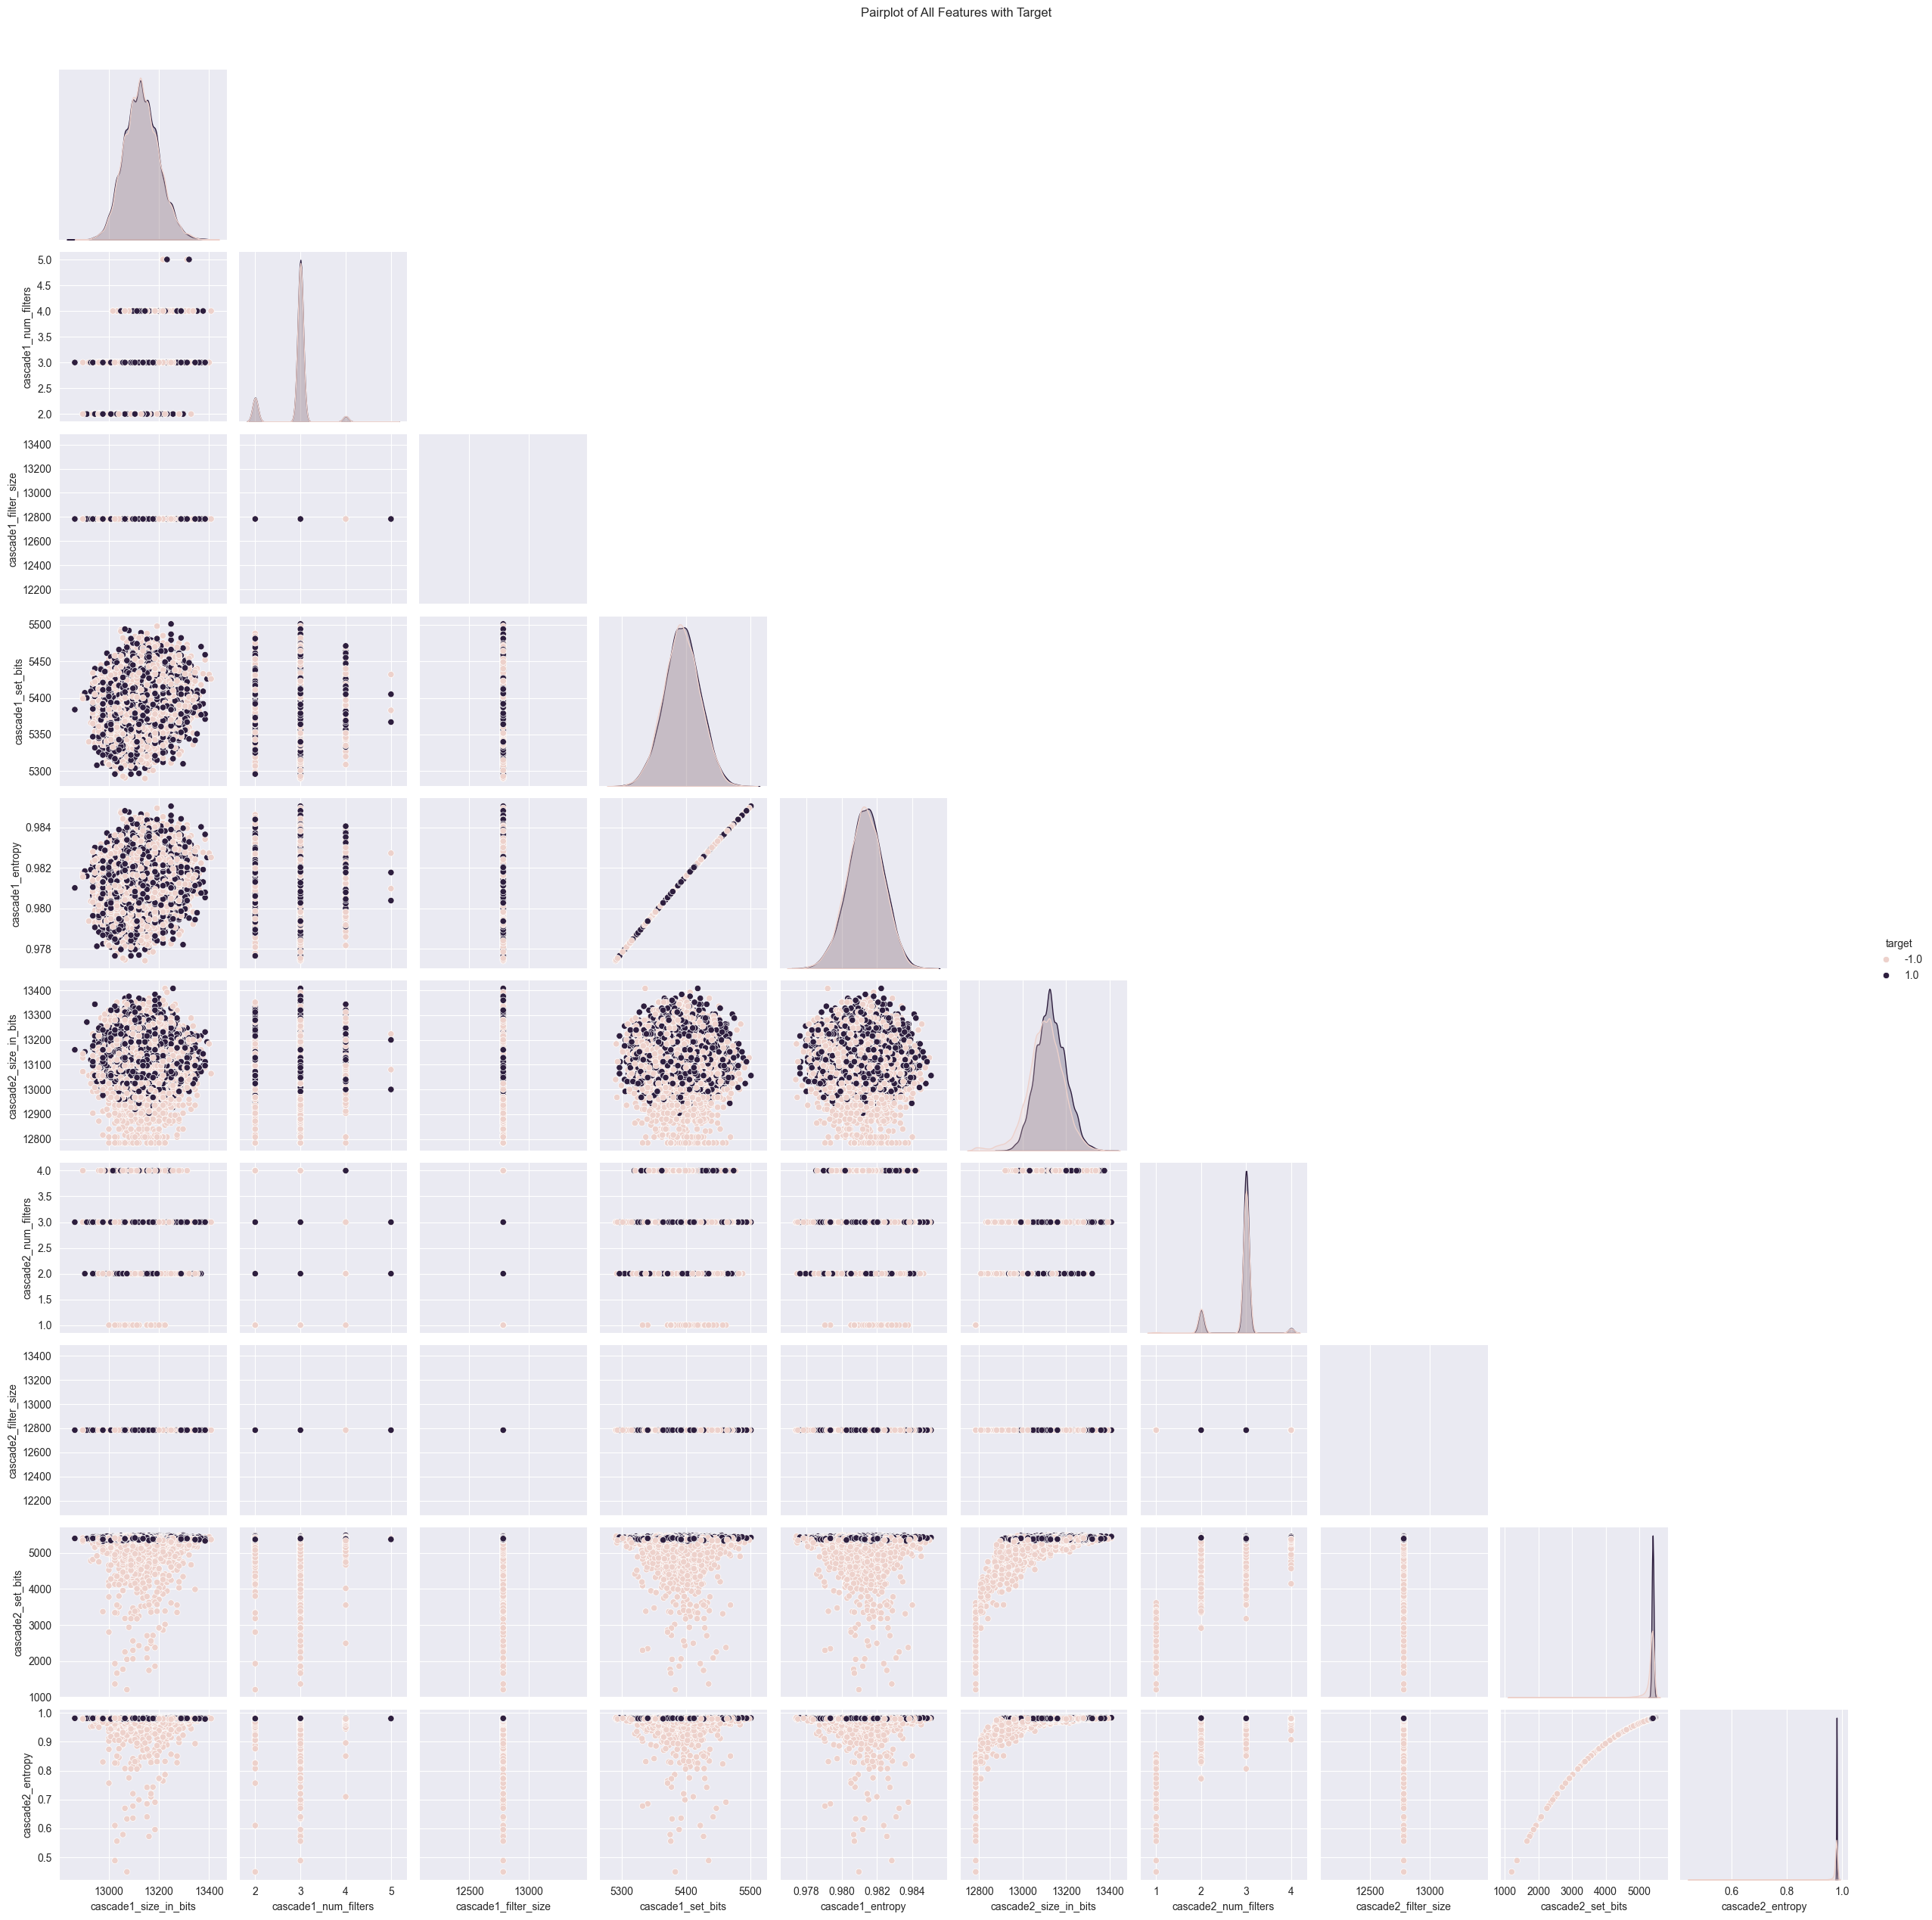

In [15]:
plt.figure(figsize=(20, 20))
sns.pairplot(df, vars=df.columns[:-1], hue='target', corner=True, diag_kind='kde')
plt.suptitle('Pairplot of All Features with Target', y=1.02)
plt.show()

(20000, 11)


<Figure size 1500x1500 with 0 Axes>

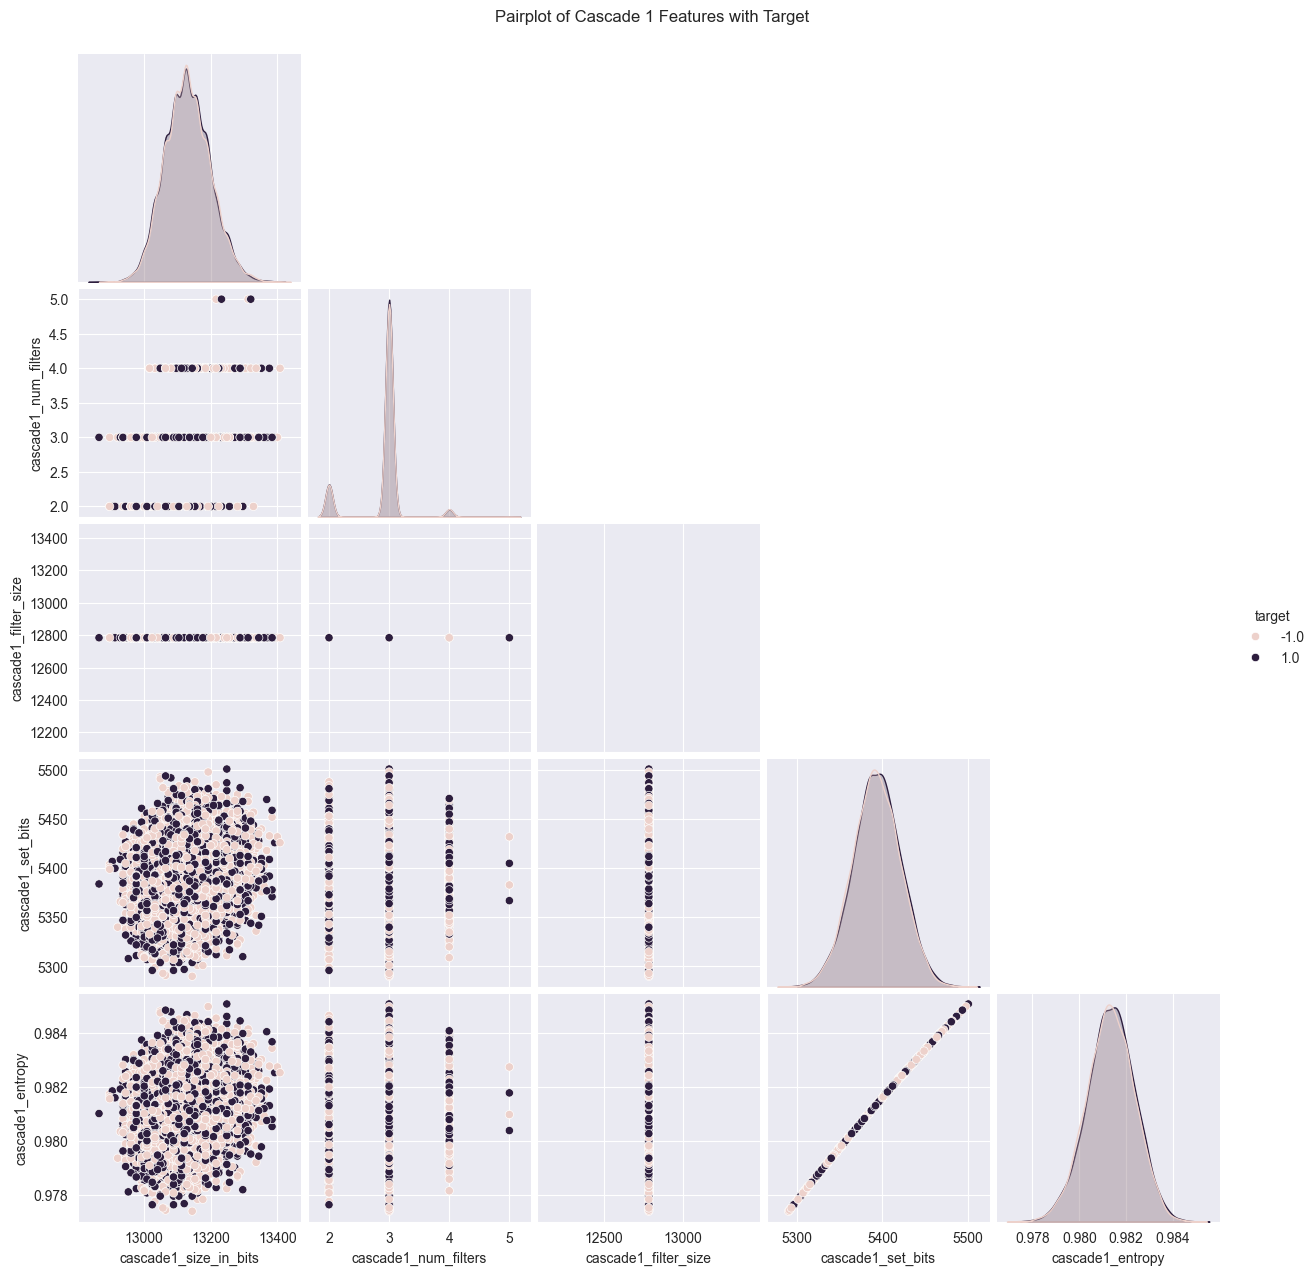

<Figure size 1500x1500 with 0 Axes>

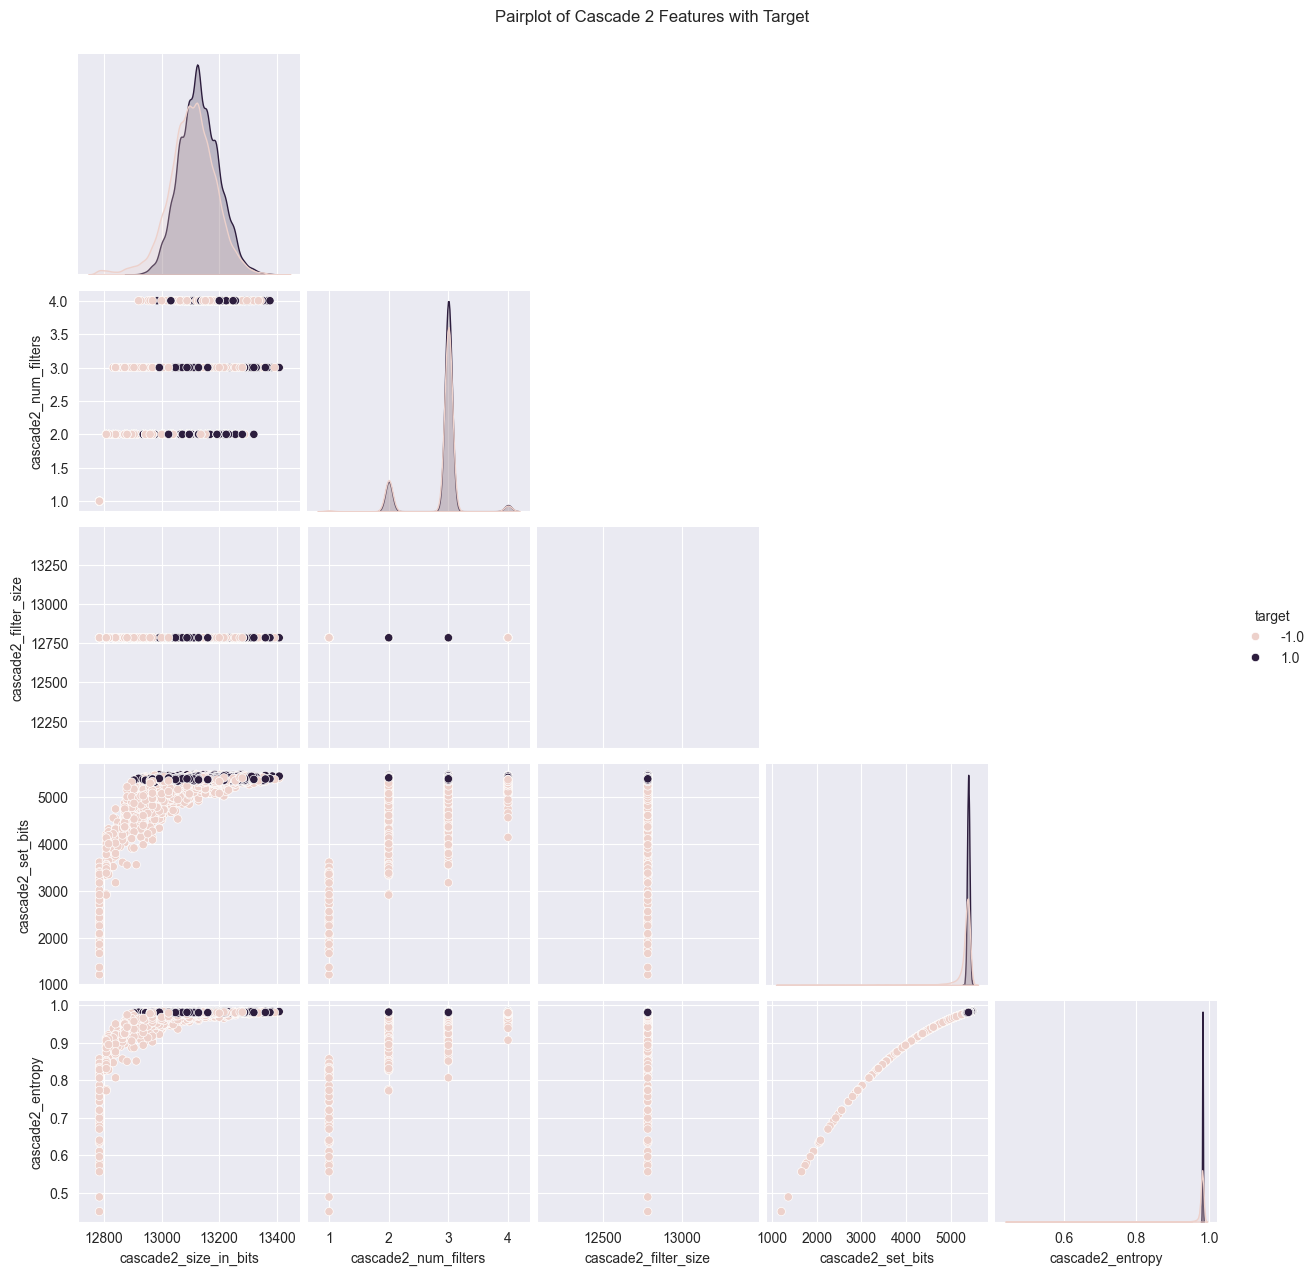

   cascade1_size_in_bits  cascade1_num_filters  cascade1_filter_size  \
0                13128.0                   3.0               12784.0   
1                13192.0                   3.0               12784.0   
2                13160.0                   3.0               12784.0   
3                13088.0                   3.0               12784.0   
4                13104.0                   3.0               12784.0   

   cascade1_set_bits  cascade1_entropy  cascade2_size_in_bits  \
0             5392.0          0.981303                13208.0   
1             5362.0          0.980195                13120.0   
2             5338.0          0.979285                13040.0   
3             5396.0          0.981448                13080.0   
4             5424.0          0.982449                13192.0   

   cascade2_num_filters  cascade2_filter_size  cascade2_set_bits  \
0                   3.0               12784.0             5339.0   
1                   3.0               12

In [16]:
print(df.shape)# Pairplot for Cascade 1
plt.figure(figsize=(15, 15))
sns.pairplot(df, vars=df.columns[:5], hue='target', corner=True, diag_kind='kde')
plt.suptitle('Pairplot of Cascade 1 Features with Target', y=1.02)
plt.show()

# Pairplot for Cascade 2
plt.figure(figsize=(15, 15))
sns.pairplot(df, vars=df.columns[5:10], hue='target', corner=True, diag_kind='kde')
plt.suptitle('Pairplot of Cascade 2 Features with Target', y=1.02)
plt.show()
print(df.head())

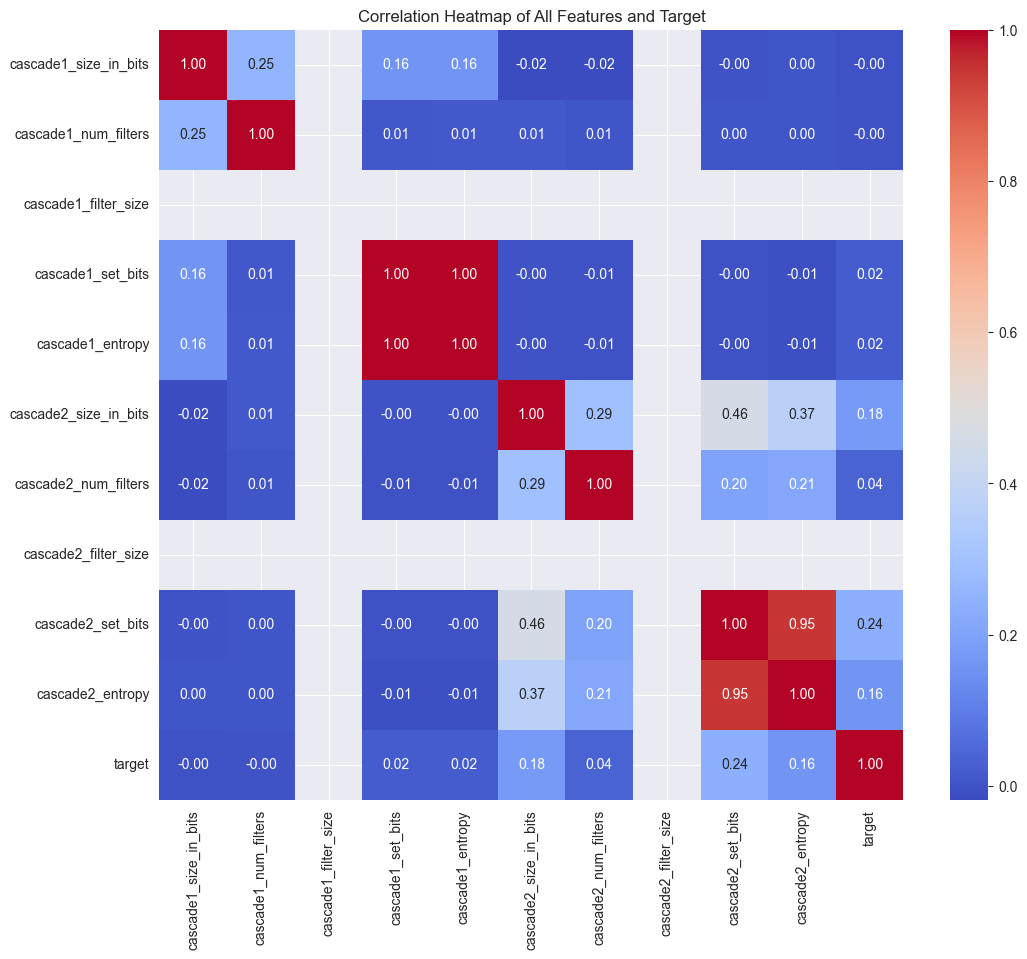

In [17]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of All Features and Target')
plt.show()

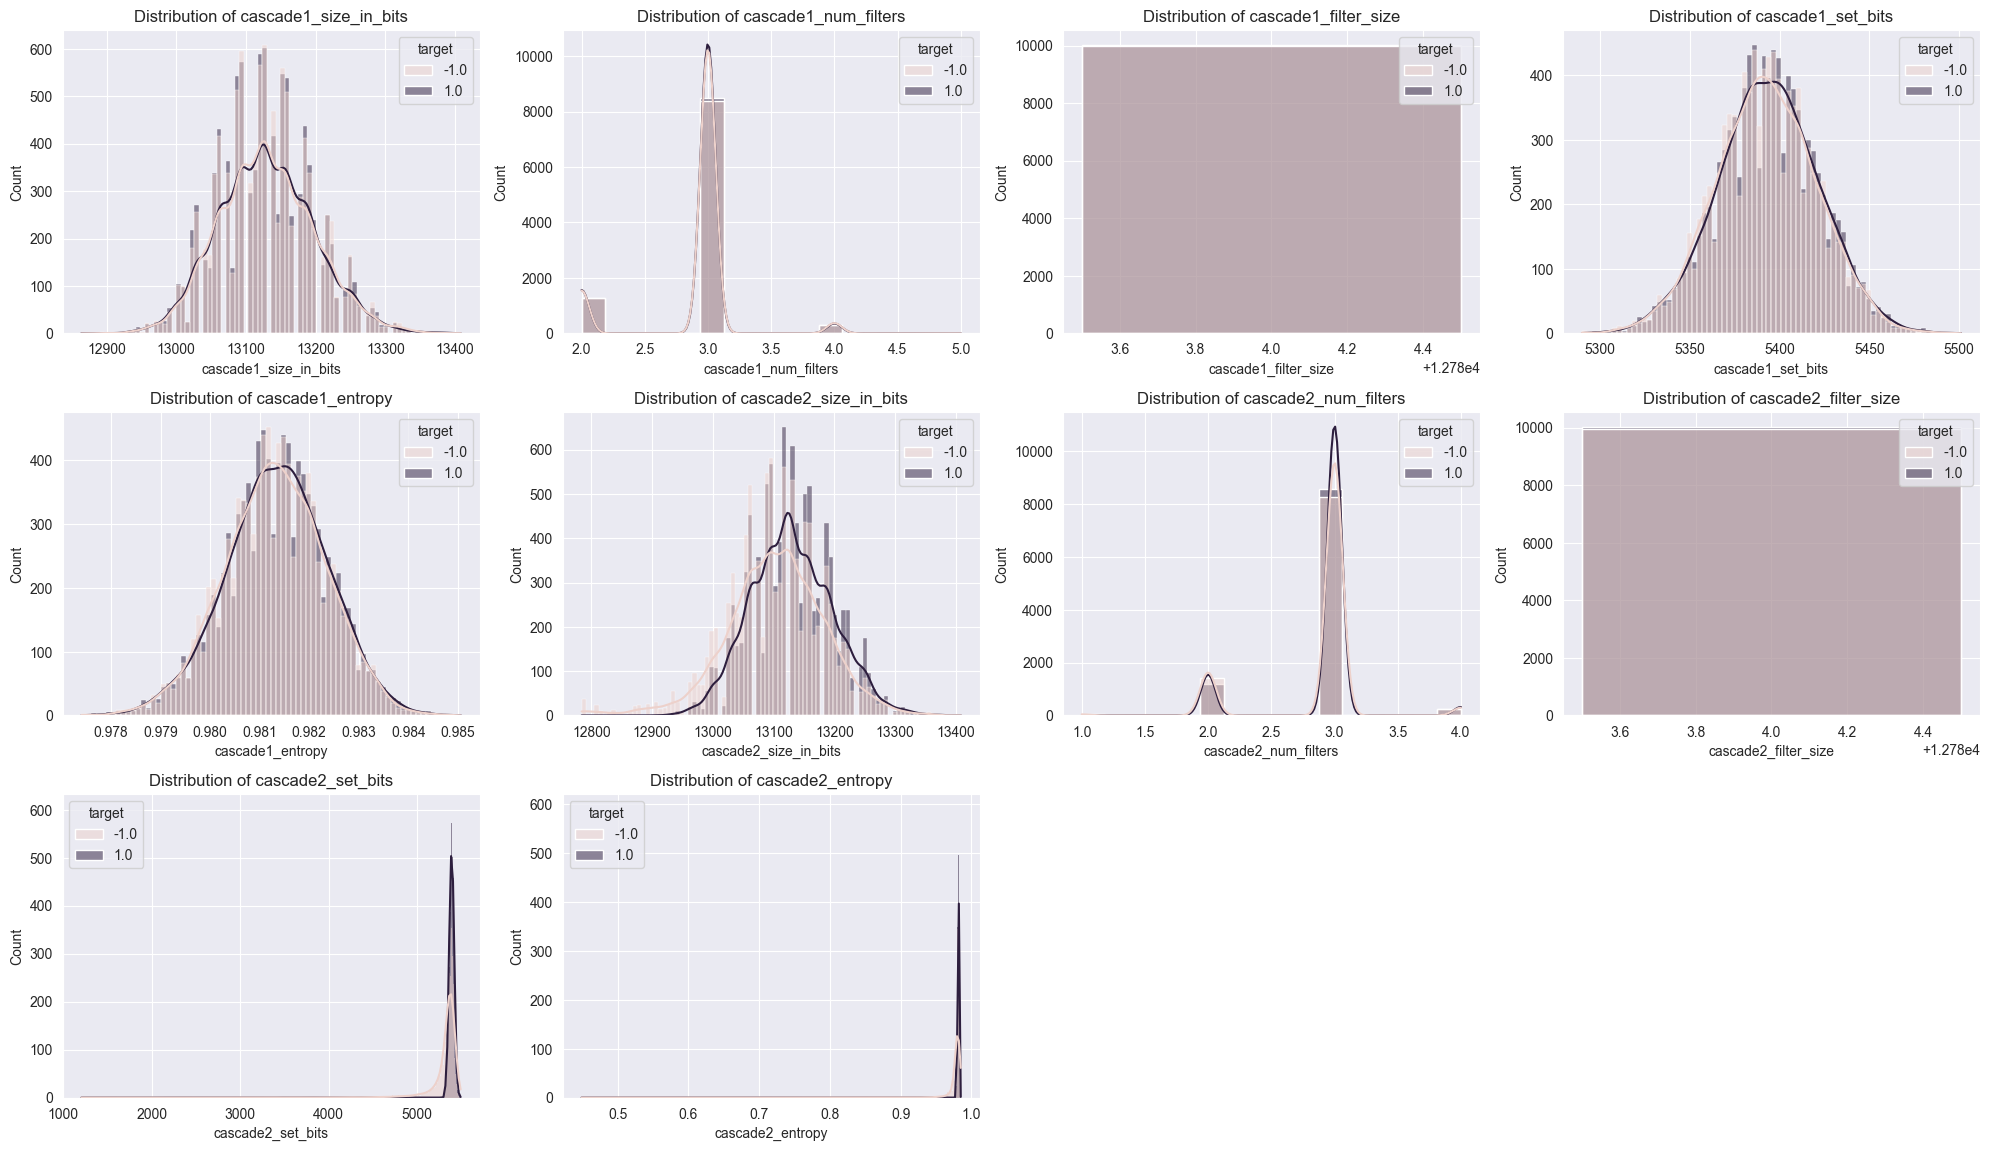

In [18]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=df, x=col, hue='target', kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

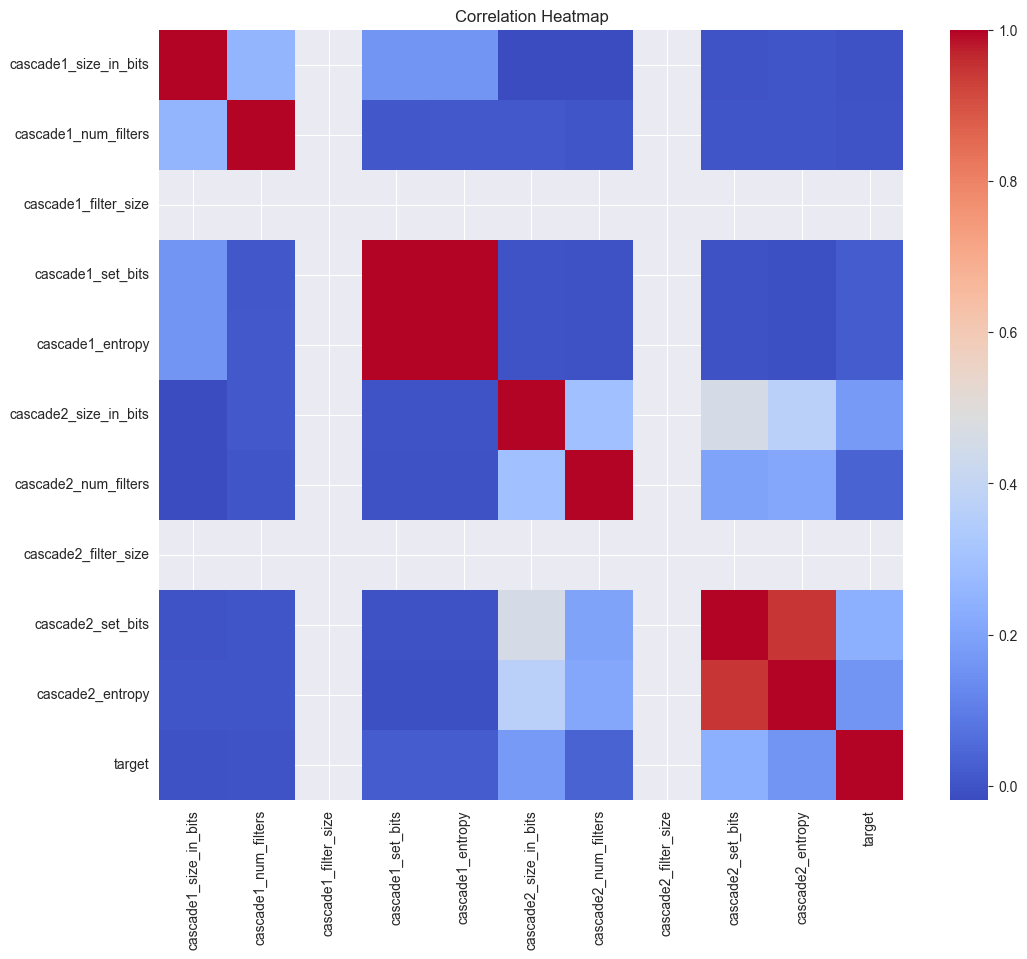

In [19]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

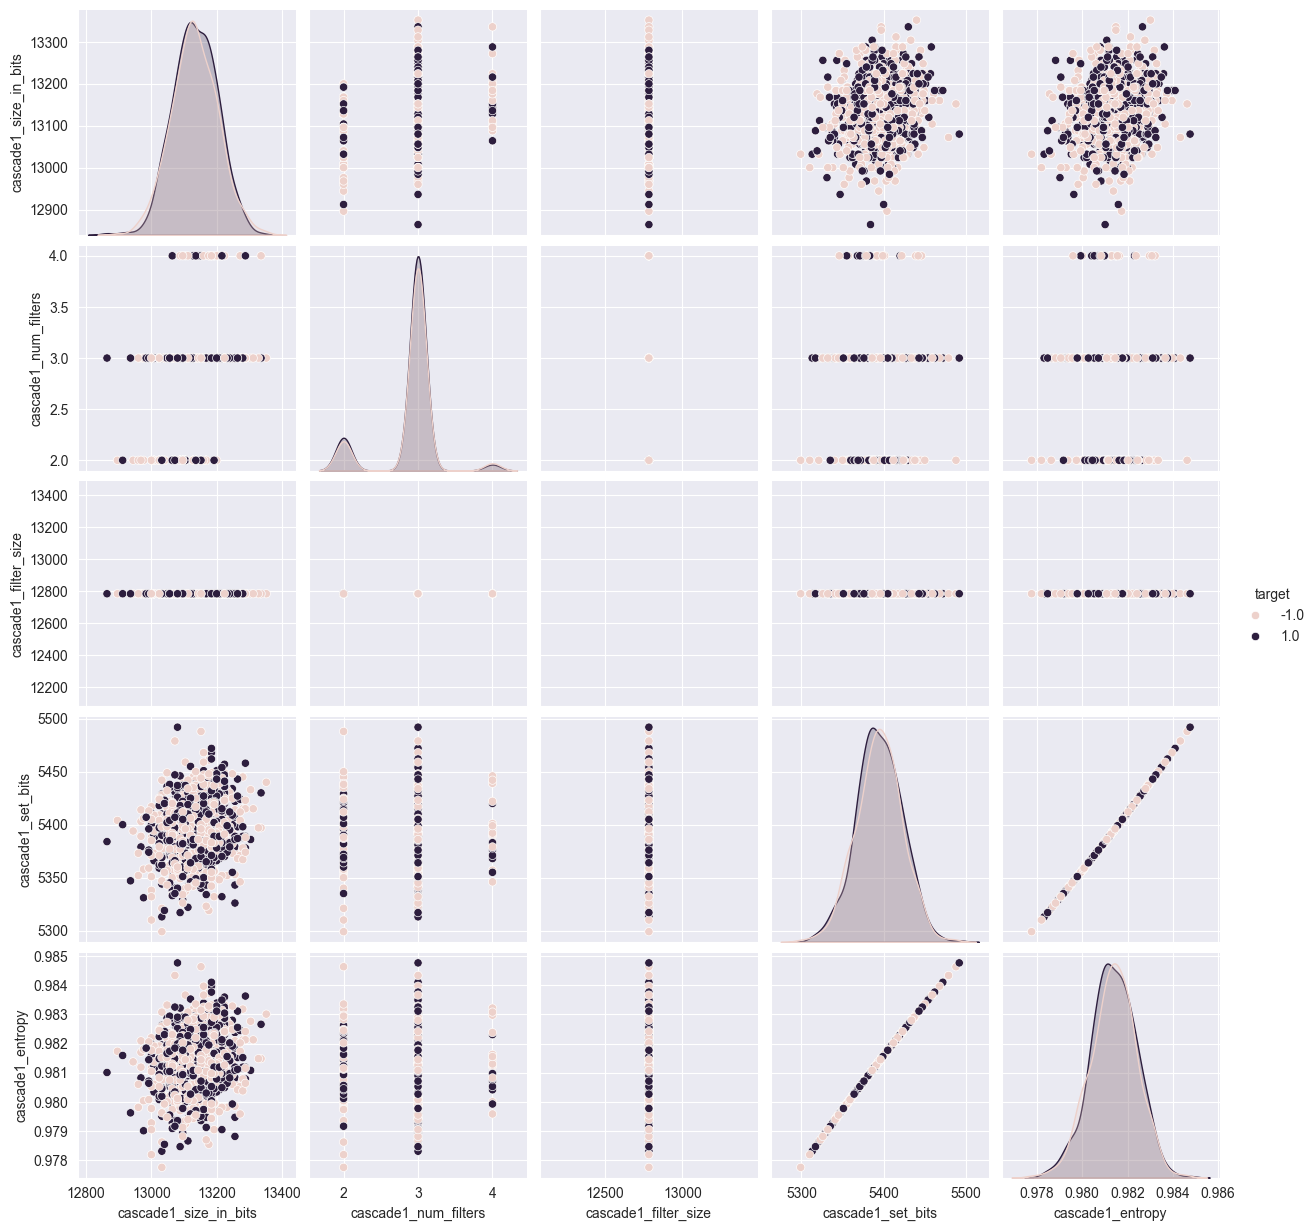

In [20]:
sns.pairplot(df.sample(1000), hue='target', vars=df.columns[:5])  # Using only first 5 features
plt.show()